# 04 — Product & Category Performance

This notebook analyses product and category performance using the reporting mart (`report_products_sample`). It identifies which categories and SKUs drive revenue and customer reach.

In [1]:
import sys
from pathlib import Path

# Add project root to Python path so `from src...` imports work when running from /notebooks
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))


In [2]:
import pandas as pd
import numpy as np

from src.io import load_sample
from src import quality, kpi_metrics as metrics
from src.viz import line_chart, barh_top

dfs = load_sample()
fact = dfs["fact_sales"]
dim_customers = dfs["dim_customers"]
dim_products = dfs["dim_products"]
report_customers = dfs["report_customers"]
report_products = dfs["report_products"]

fact.head()


,order_number,product_key,customer_key,order_date,shipping_date,due_date,sales_amount,quantity,price
0,SO54496,282,5400,2013-03-16,2013-03-23,2013-03-28,25,1,25
1,SO54496,289,5400,2013-03-16,2013-03-23,2013-03-28,5,1,5
2,SO54496,259,5400,2013-03-16,2013-03-23,2013-03-28,2,1,2
3,SO54497,174,9281,2013-03-16,2013-03-23,2013-03-28,22,1,22
4,SO54497,280,9281,2013-03-16,2013-03-23,2013-03-28,9,1,9


In [ ]:
# Schema validation (fail fast if inputs change)
from src.core.schema_checks import assert_required_columns, REQUIRED

assert_required_columns(fact, REQUIRED["fact_sales"], "fact_sales")
assert_required_columns(dim_customers, REQUIRED["dim_customers"], "dim_customers")
assert_required_columns(dim_products, REQUIRED["dim_products"], "dim_products")

In [3]:
from src.core import ensure_output_dirs
ensure_output_dirs()


{'base': WindowsPath('outputs'),
 'tables': WindowsPath('outputs/tables'),
 'figures': WindowsPath('outputs/figures')}

In [4]:
# Top products by total sales
top_p = report_products.sort_values("total_sales", ascending=False).head(20)
top_p[["product_name","category","subcategory","product_segment","total_sales","total_customers"]].head(10)


,product_name,category,subcategory,product_segment,total_sales,total_customers
18,Mountain-200 Black- 46,Bikes,Mountain Bikes,High-Performer,1373454,600
17,Mountain-200 Black- 42,Bikes,Mountain Bikes,High-Performer,1363128,604
19,Mountain-200 Silver- 38,Bikes,Mountain Bikes,High-Performer,1339394,583
21,Mountain-200 Silver- 46,Bikes,Mountain Bikes,High-Performer,1298709,566
16,Mountain-200 Black- 38,Bikes,Mountain Bikes,High-Performer,1292559,564
20,Mountain-200 Silver- 42,Bikes,Mountain Bikes,High-Performer,1257368,547
37,Road-250 Black- 52,Bikes,Road Bikes,High-Performer,734425,312
39,Road-250 Red- 58,Bikes,Road Bikes,High-Performer,702666,301
36,Road-250 Black- 48,Bikes,Road Bikes,High-Performer,691213,289
35,Road-250 Black- 44,Bikes,Road Bikes,High-Performer,628384,266


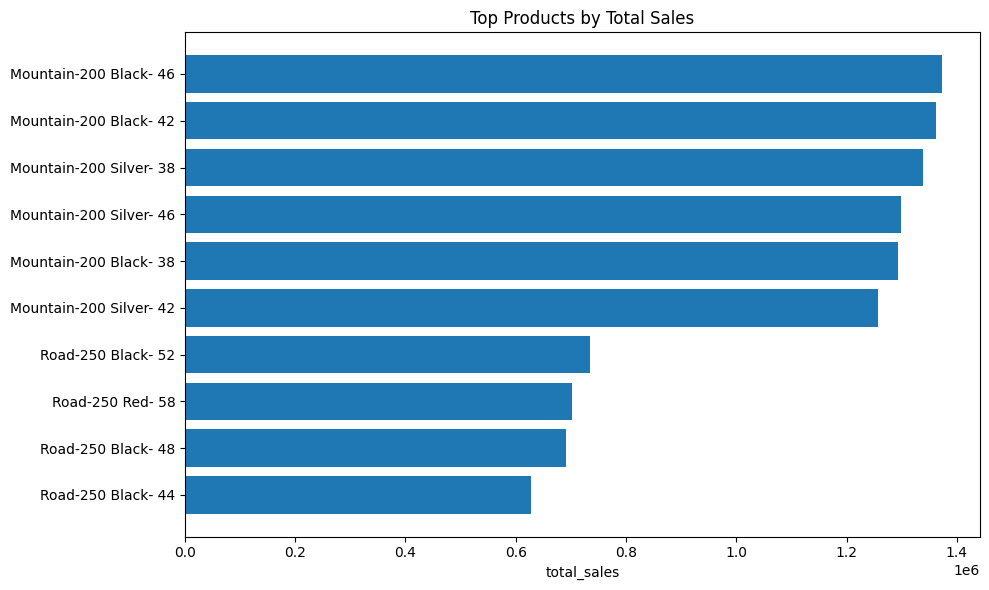

'outputs/figures/top_products_sales.png'

In [5]:
fig_path = "outputs/figures/top_products_sales.png"
barh_top(top_p, "product_name", "total_sales", "Top Products by Total Sales", top_n=10, path=fig_path)
fig_path


In [6]:
# Category summary
cat = report_products.groupby(["category","subcategory"], dropna=False)["total_sales"].sum().sort_values(ascending=False)
cat.head(10)


category     subcategory      
Bikes        Mountain Bikes       8606514
             Road Bikes           7252123
             Touring Bikes        3844580
Accessories  Tires and Tubes       244445
             Helmets               225400
Clothing     Jerseys               173084
             Shorts                 71330
Accessories  Bottles and Cages      56984
             Fenders                46662
             Hydration Packs        40315
Name: total_sales, dtype: int64

In [7]:
# Export tables
top_path = "outputs/tables/top_products.csv"
cat_path = "outputs/tables/category_summary.csv"

top_p.to_csv(top_path, index=False)
cat.reset_index().rename(columns={"total_sales":"revenue"}).to_csv(cat_path, index=False)

(top_path, cat_path)


('outputs/tables/top_products.csv', 'outputs/tables/category_summary.csv')

In [ ]:
# Recruiter-friendly: dashboard preview at the end (no scrolling)
from IPython.display import Image, display

for fp in [
    "../powerbi/screenshots/dashboard_customer_360.png",
    "../powerbi/screenshots/dashboard_product_performance.png",
    "../powerbi/screenshots/dashboard_data_quality.png",
]:
    display(Image(filename=fp, width=1200))